In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.stats import uniform
%matplotlib inline  
# Поддержка русскоязычных надписей.
pylab.rc('font',**{'family':'verdana'})

In [2]:
# Генерируем 100 выборок мощности 1000 из равномерного распределения [0; theta]
sampleSize = 1000
sampleNumber = 100
def generate(theta):
    return [uniform.rvs(scale=theta, size=sampleSize) for i in range(0, sampleNumber)]

In [3]:
# Высчитывает кортеж всех оценок по подвыборке.
def calculateEstimations(sample):
    n = len(sample)
    return (2 * sample.mean(),
            (n + 1) * np.amin(sample),
            np.amax(sample) + np.amin(sample),
            ((n + 1) / (n)) * np.amax(sample))

In [4]:
# Квадратичная функция потерь.
def loss(theta, est):
    return (theta - est)**2

In [5]:
# Усредняет кортежи.
def getAverage(tuples):
    result = np.zeros(len(tuples[0]))
    for T in tuples:
        for i in range(0, len(result)):
            result[i] += T[i]
    for i in range(0, len(result)):
        result[i] /= len(tuples)
    return result

In [6]:
# Считает функцию потери по всем результатам.
def calculateLoss(theta, ests):
    result = [[0 for j in range(len(ests[0]))] for i in range(len(ests))]
    for i in range(0, len(ests)):
        for j in range(0, len(ests[i])):
            result[i][j] = loss(theta, ests[i][j])
    return result

In [9]:
def showEstimations(theta, ylim):
    samples = generate(theta)
    results = []
    for n in range(1, sampleSize):
        # посчитать по 100 выборкам и усреднить
        ests = []
        # Для фиксированного n считаем оценки для M выброк.
        for k in range(1, sampleNumber):
            ests.append(calculateEstimations(samples[k][:n]))
        _loss = calculateLoss(theta, ests)
        results.append(getAverage(_loss))
    # Строим график.
    labels = [r'2$\overline{X}$', 
              r'$(n+1)X_{(1)}$', 
              r'$X_{(n)} + X_{(1)}}$', 
              r'$\frac{n+1}{n}X_{(n)}$']
    plt.figure(figsize=(16, 8))
    for i in range(0, len(results[0])):
        y = [results[t][i] for t in range(0, len(results))]
        plt.plot(y, label=labels[i])
    plt.legend()
    plt.ylim(0, ylim)
    plt.title("График зависимости квадратичной функции потерь от размера подвыборки, theta = " + str(theta))
    plt.show()

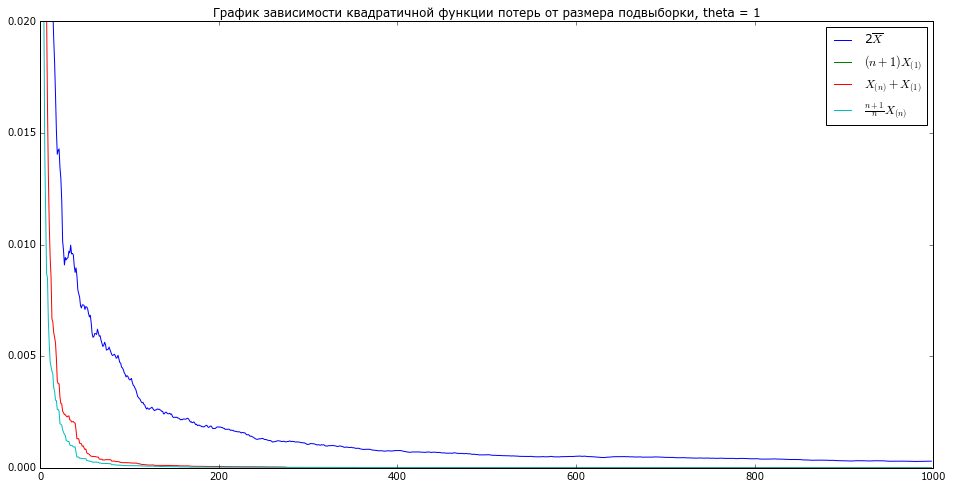

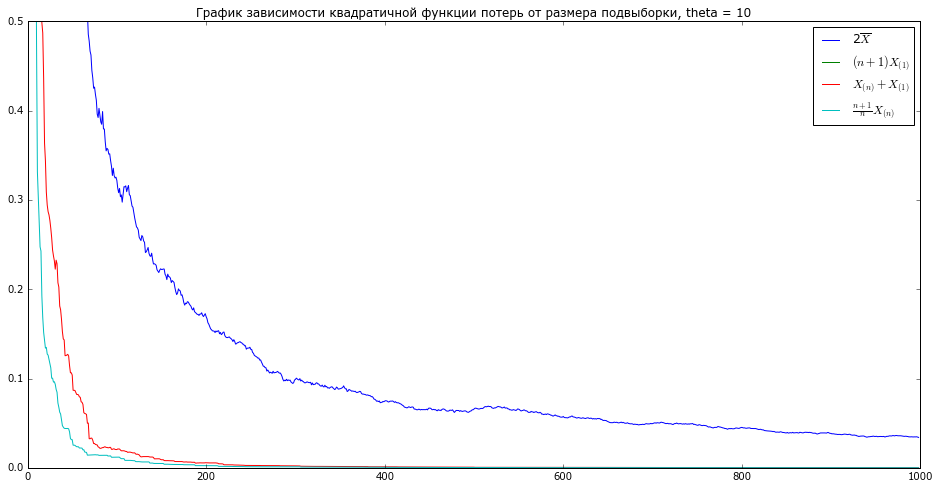

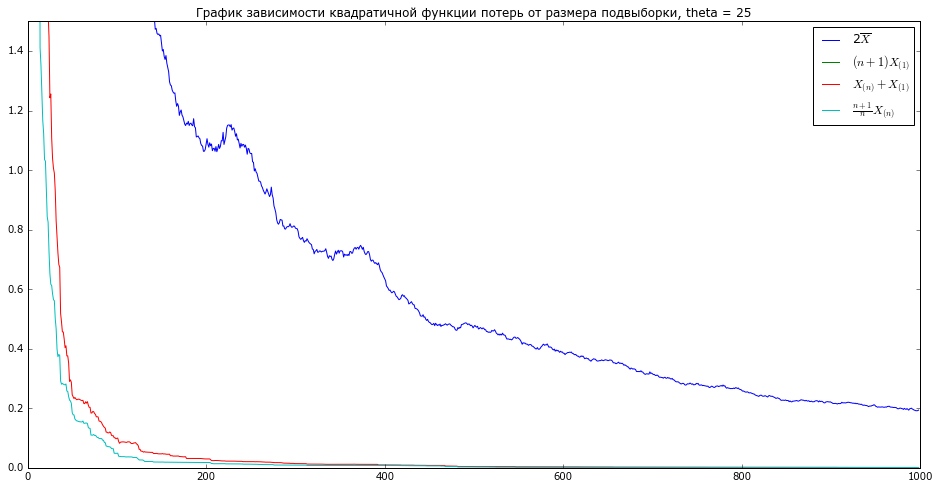

In [10]:
# Исследуем для различных theta.
showEstimations(1, .02)
showEstimations(10, .5)
showEstimations(25, 1.5)